# DSA PROJECT
# TEAM:
<b>1. I SAI PRADEEP (AI21BTECH11013)<br>
<b>2. SURAJ KUMAR (AI21BTECH11029)

In [ ]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from statsmodels.tools import add_constant
from statsmodels.discrete.discrete_model import Logit

In [ ]:
# The link for our dataset is given below:
#https://www.kaggle.com/datasets/shrutimehta/nasa-asteroids-classification

In [ ]:
# downloading and unzipping the file, and saving it as nasa.csv
df=pd.read_csv('nasa.csv')
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [ ]:
df.tail()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False
4686,3772978,3772978,19.109,0.400641,0.895860,400.640618,895.859655,0.248946,0.556661,1314.437764,...,187.642183,653.679098,0.876110,222.436688,2.071980,2.458319e+06,184.820424,0.550729,J2000,False


In [ ]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


## Handling dataset NULL value

In [ ]:
nan_counts = df.isna().sum()
nan_cols = nan_counts[nan_counts > 0].index.tolist()
nan_cols

[]

In [ ]:
df=df.sort_values(by='Hazardous',ascending=False)

In [ ]:
X=df.drop(columns=df.columns[[0,1, 11,12,20,22,-2,-1]])
Y=df['Hazardous'].astype(int)


In [ ]:
# list of features in our dataset
df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

  EXPLORATORY DATA ANALYSIS EDA

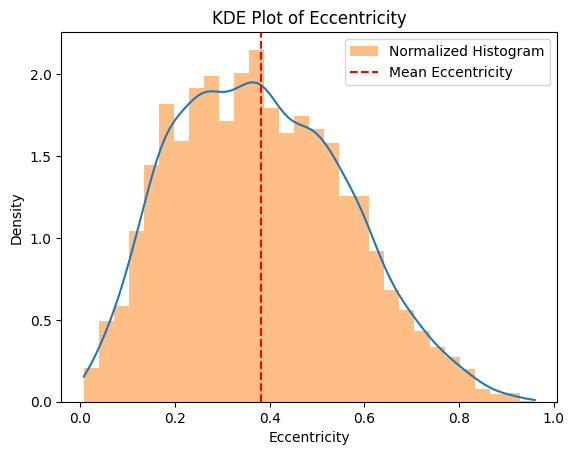

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
ecentricity=df['Eccentricity']
eccentricity_data = ecentricity
# plotting the kde
kde = stats.gaussian_kde(eccentricity_data)
x = np.linspace(min(eccentricity_data), max(eccentricity_data), 100)
density = kde(x)

plt.plot(x, density)
plt.xlabel("Eccentricity")
plt.ylabel("Density")
plt.title("KDE Plot of Eccentricity")
plt.hist(eccentricity_data, bins=30, density=True, alpha=0.5, label='Normalized Histogram')
mean_ecc = np.mean(eccentricity_data)
plt.axvline(mean_ecc, color='r', linestyle='dashed', label='Mean Eccentricity')
plt.legend()
plt.show()


Correlation coefficient between log(Est Dia in KM(max)) and Absolute Magnitude: -1.0


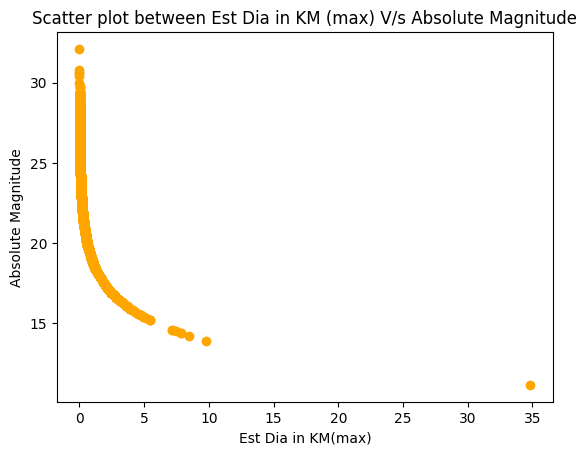

In [ ]:
x=df['Est Dia in KM(max)']
y=df['Absolute Magnitude']

plt.title('Scatter plot between Est Dia in KM (max) V/s Absolute Magnitude')
plt.scatter(x,y,color='orange')
plt.xlabel('Est Dia in KM(max)')
plt.ylabel('Absolute Magnitude')
plt.plot()

def correlation_coefficient(a, b):
    correlation_matrix = np.corrcoef(a, b)
    correlation_coeff = correlation_matrix[0, 1]
    return correlation_coeff

corr_coeff = correlation_coefficient(np.log(x), y)
print("Correlation coefficient between log(Est Dia in KM(max)) and Absolute Magnitude:", corr_coeff)


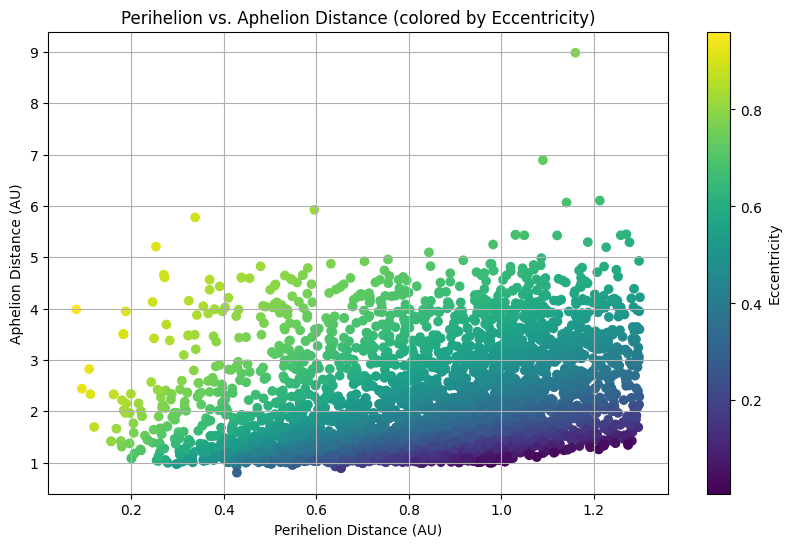

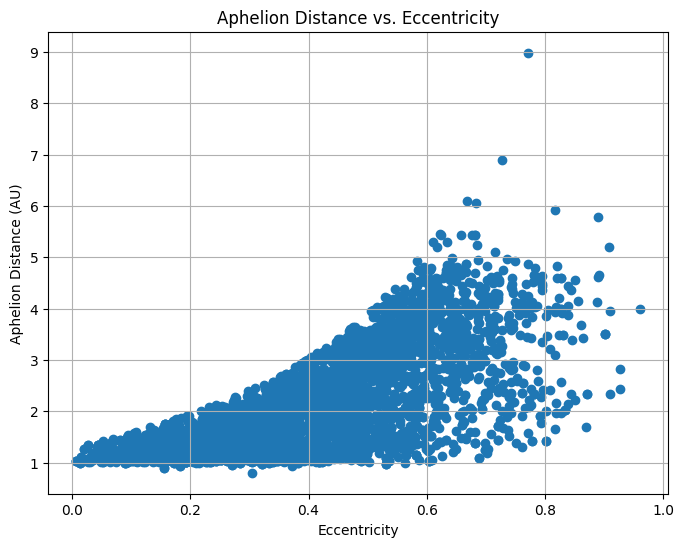

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

aphelion_distances = df['Aphelion Dist'].tolist()
perihelion_distances = df['Perihelion Distance'].tolist()
eccentricity = df["Eccentricity"].tolist()

plt.figure(figsize=(10, 6))
plt.scatter(perihelion_distances, aphelion_distances, c=eccentricity, cmap='viridis')
plt.xlabel("Perihelion Distance (AU)")
plt.ylabel("Aphelion Distance (AU)")
plt.title("Perihelion vs. Aphelion Distance (colored by Eccentricity)")
plt.colorbar(label='Eccentricity')
plt.grid(True)
plt.show()

# Scatter plot: Aphelion Distance vs Eccentricity
plt.figure(figsize=(8, 6))
plt.scatter(eccentricity, aphelion_distances)
plt.xlabel("Eccentricity")
plt.ylabel("Aphelion Distance (AU)")
plt.title("Aphelion Distance vs. Eccentricity")
plt.grid(True)
plt.show()

# Subplot with scatter plot and eccentricity distribution (can be more complex to implement)
# ... You can implement this using techniques from libraries like matplotlib.gridspec ...


In [ ]:
import numpy as np
from scipy import stats

def check_normality(eccentricity_list):
  """
  This function checks if a list of eccentricity values follows a normal distribution
  using the Kolmogorov-Smirnov (KS) test and the Shapiro-Wilk test.

  Args:
      eccentricity_list: A list of eccentricity values.

  Returns:
      A dictionary containing the results of the normality tests:
          - ks_statistic: The KS test statistic.
          - ks_pvalue: The p-value of the KS test.
          - shapiro_wilk_statistic: The Shapiro-Wilk test statistic.
          - shapiro_wilk_pvalue: The p-value of the Shapiro-Wilk test.
          - is_normal_ks: True if the KS test fails to reject the null hypothesis
                          (data is normal) at a significance level of alpha, False otherwise.
          - is_normal_shapiro_wilk: True if the Shapiro-Wilk test fails to reject the null hypothesis
                                    (data is normal) at a significance level of alpha, False otherwise.
  """
  # Convert the list to a numpy array
  data = np.array(eccentricity_list)

  # Perform the KS test
  ks_statistic, ks_pvalue = stats.kstest(data, 'norm')

  # Perform the Shapiro-Wilk test
  shapiro_wilk_statistic, shapiro_wilk_pvalue = stats.shapiro(data)

  # Set significance level (alpha) for normality tests (commonly 0.05)
  alpha = 0.05

  # Check if tests reject null hypothesis (data is normal)
  is_normal_ks = ks_pvalue > alpha
  is_normal_shapiro_wilk = shapiro_wilk_pvalue > alpha

  # Return results as a dictionary
  return {
      "ks_statistic": ks_statistic,
      "ks_pvalue": ks_pvalue,
      "shapiro_wilk_statistic": shapiro_wilk_statistic,
      "shapiro_wilk_pvalue": shapiro_wilk_pvalue,
      "is_normal_ks": is_normal_ks,
      "is_normal_shapiro_wilk": is_normal_shapiro_wilk
  }

# Example usage
# eccentricity_data = [0.2, 0.35, 0.1, 0.8, 0.4, ...]  # Replace with your actual data
# eccentricity_data=np.log(ecentricity)
num_normal=0
for i in ['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous']:
  eccentricity_data=df[i]
  alpha=0.05
  try:
    normality_results = check_normality(eccentricity_data)
  except:
    continue
    #print(f'left {i}')
  # print(f"KS Test Statistic: {normality_results['ks_statistic']}")
  # print(f"KS Test p-value: {normality_results['ks_pvalue']}")
  # print(f"Shapiro-Wilk Statistic: {normality_results['shapiro_wilk_statistic']}")
  # print(f"Shapiro-Wilk p-value: {normality_results['shapiro_wilk_pvalue']}")
  num_normal+=1
  if(normality_results['is_normal_ks']):
    print(f"Is data normal according to KS test (p-value > {alpha}): {normality_results['is_normal_ks']}")
  elif(normality_results['is_normal_shapiro_wilk']):
   print(f"Is data normal according to Shapiro-Wilk test (p-value > {alpha}): {normality_results['is_normal_shapiro_wilk']}")
  else:
    num_normal-=1
if(num_normal==0):
  print('None of the features follow normality according to KS test and Shapiro-Wilk test')

None of the features follow normality according to KS test and Shapiro-Wilk test


# Correlation Analysis

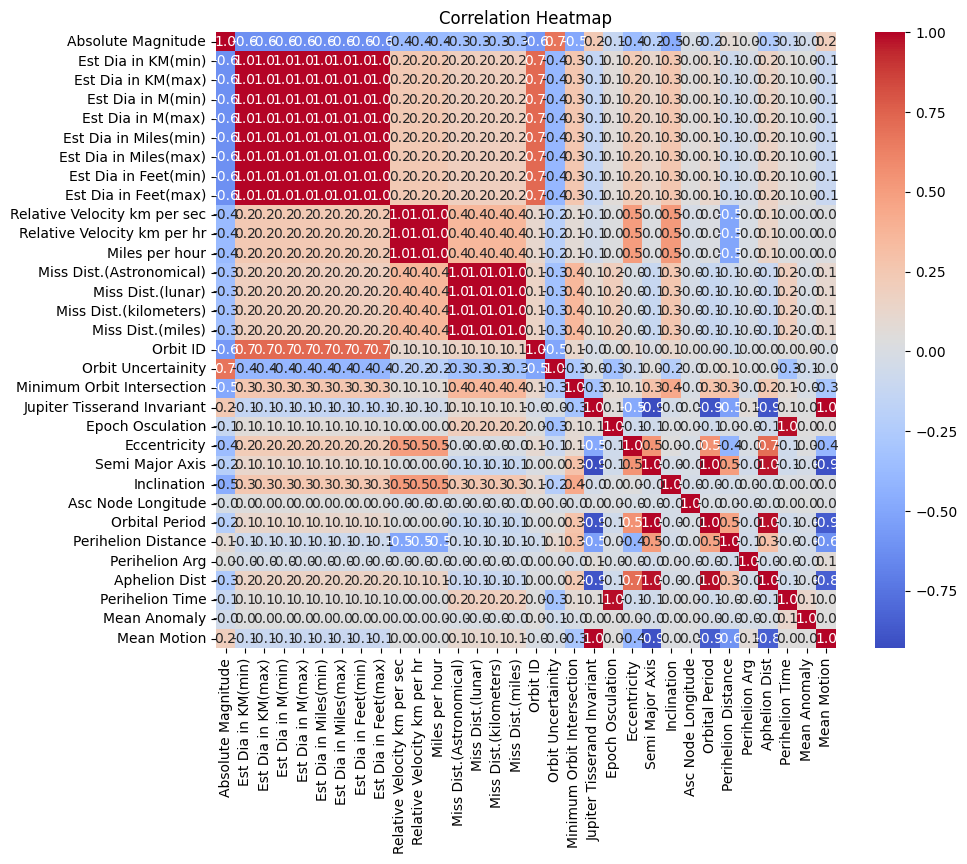

In [ ]:
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
# Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

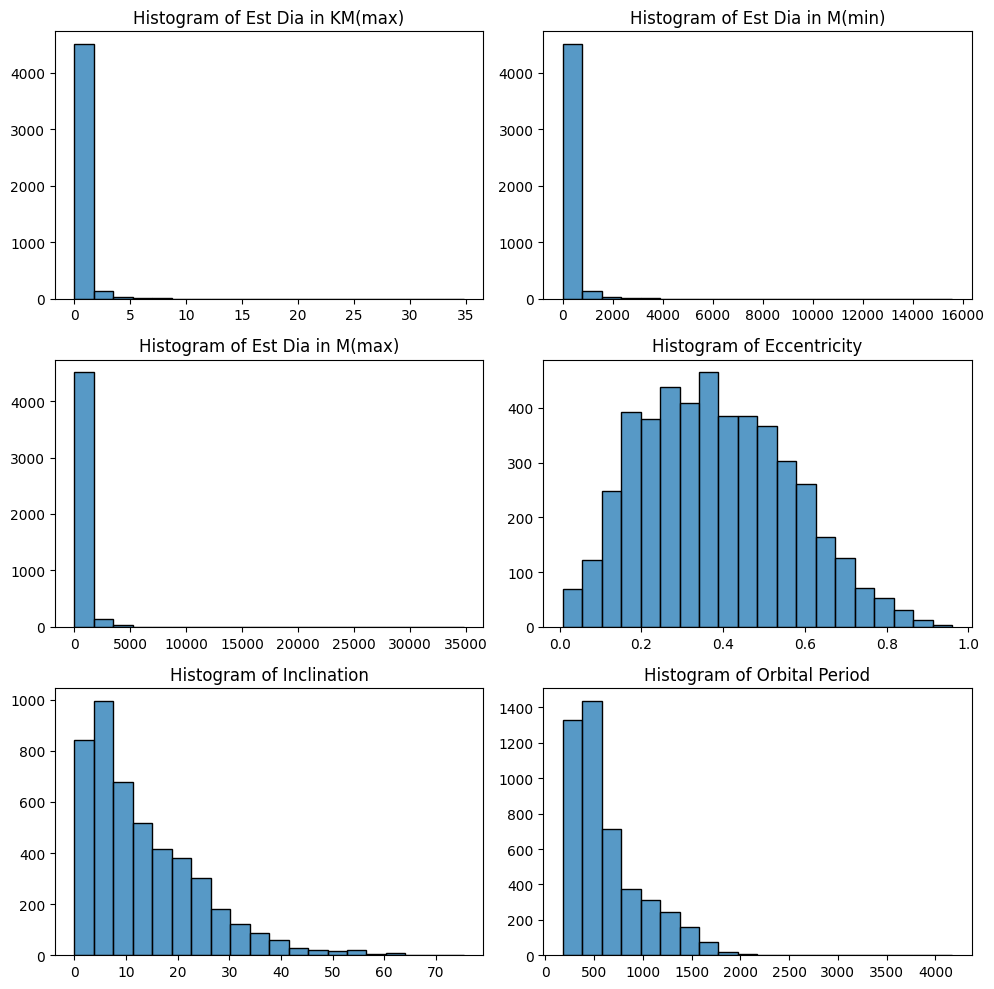

In [ ]:
numerical_columns = ['Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)','Eccentricity','Inclination','Orbital Period']
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

axes = axes.flatten()
for i, column in enumerate(numerical_columns):
    sns.histplot(data=df, x=column, bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()

# plots adding in EDA

32.1


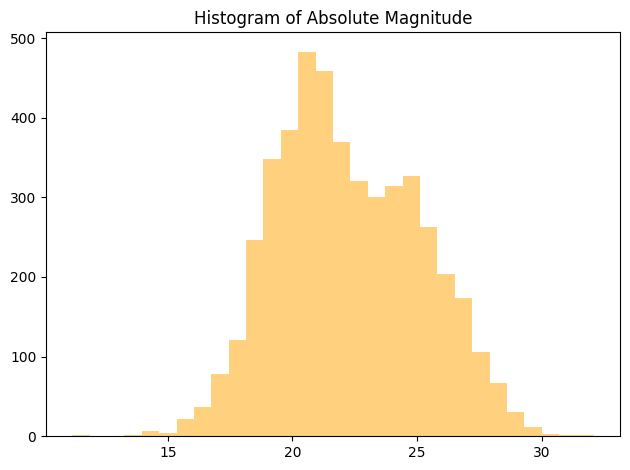

Peak of the histogram: 20.583000000000002


In [ ]:
numerical_columns = ['Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)','Eccentricity','Inclination','Orbital Period']
fig, axes = plt.subplots(1, 1)
numerical_columns=['Absolute Magnitude']#,'Inclination','Orbital Period']

for i, column in enumerate(numerical_columns):
    dat=df[column]
    print(np.max(dat))
    plt.hist(dat,alpha=0.5,color='orange',edgecolor='none', bins=30)
    axes.set_title(f'Histogram of {column}')
    axes.set_xlabel('')
    axes.set_ylabel('')
    plt.tight_layout()
    plt.show()

    counts, bins = np.histogram(dat, bins=30)
    peak_index = np.argmax(counts)

    peak_value = (bins[peak_index] + bins[peak_index + 1]) / 2

    print("Peak of the histogram:", peak_value)

75.40666684157466


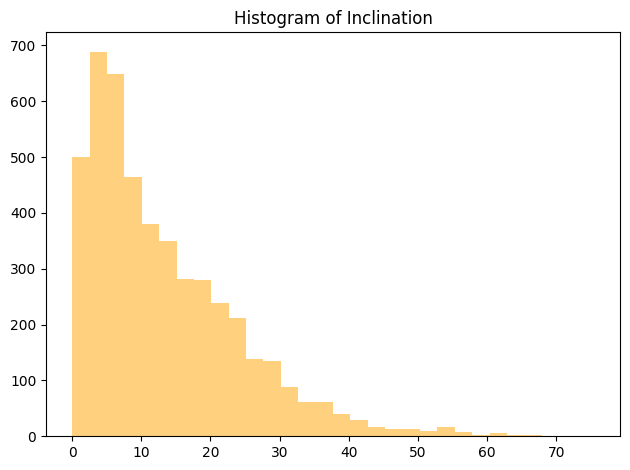

Peak of the histogram: 3.7841206381468364


In [ ]:
numerical_columns = ['Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)','Eccentricity','Inclination','Orbital Period']
fig, axes = plt.subplots(1, 1)
numerical_columns=['Inclination']#,'Inclination','Orbital Period']

for i, column in enumerate(numerical_columns):
    dat=df[column]
    print(np.max(dat))
    plt.hist(dat,alpha=0.5,color='orange',edgecolor='none', bins=30)
    axes.set_title(f'Histogram of {column}')
    axes.set_xlabel('')
    axes.set_ylabel('')
    plt.tight_layout()
    plt.show()

    counts, bins = np.histogram(dat, bins=30)
    peak_index = np.argmax(counts)

    peak_value = (bins[peak_index] + bins[peak_index + 1]) / 2

    print("Peak of the histogram:", peak_value)

Orbit ID: This variable is likely just an identifier for the orbit of the asteroid and may not have direct relevance to its hazard classification.

Epoch Osculation: While the epoch at which the orbital parameters were calculated is important for tracking and prediction, it may not directly influence whether an asteroid is hazardous or not.

Orbit Uncertainty: While uncertainty in orbit calculation is crucial for scientific accuracy, it may not be directly related to whether an asteroid poses a hazard.

Jupiter Tisserand Invariant: While this parameter helps classify objects orbiting the Sun, it might not be directly relevant to determining whether an asteroid is hazardous or not to Earth.

Orbital Period: While the orbital period provides information about the asteroid's orbit, it may not be directly related to its hazard classification.

Perihelion Arg and Perihelion Time: These variables describe aspects of the asteroid's orbit but might not be directly relevant to determining its hazard classification.

Mean Anomaly and Mean Motion: These variables describe the position and motion of the asteroid along its orbit, which might not be directly related to its hazard classification

In [ ]:
X=X.to_numpy()
Y=Y.to_numpy()

## Performing PCA to remove all insignificant variable from dataset.we want to keep components explaining 99% of the variance.

In [ ]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA Calculation
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Select Principal Components
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance_ratio_cumulative >= 0.99) + 1
print("Number of components to retain:", n_components)

# Projection
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)

Number of components to retain: 14


In [ ]:
scaler = MinMaxScaler()

# Fit the scaler on your feature matrix and transform it
X_normalized = scaler.fit_transform(X_reduced)

In [ ]:
X_train=X_reduced[150:4687-1500,:]
X_test=np.vstack((X_reduced[:150,:],X_reduced[4687-1500:,:]))
y_train=Y[150:4687-1500]
y_test=np.hstack((Y[:150],Y[4687-1500:]))

In [ ]:
np.count_nonzero(y_test==1),y_test.size-np.count_nonzero(y_test==1),y_test.size

(150, 1500, 1650)

# CLASSIFICATION TASK

In [ ]:
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Logistic Regression Ridge", LogisticRegression(penalty='l2')),
    ("SVM", SVC()),
    ("Random Forest", RandomForestClassifier()),
    ("Decision Tree", DecisionTreeClassifier())
]

In [ ]:
cv_scores={}
for name, model in models:
  model.fit(X_train, y_train)
  scores = cross_val_score(model, X_train, y_train, cv=10)
  print(f'{model} accuracy: {np.mean(scores)}')
  cv_scores[name] = np.mean(scores)


LogisticRegression() accuracy: 0.929532525620983
LogisticRegression() accuracy: 0.929532525620983
SVC() accuracy: 0.9390915407330207
RandomForestClassifier() accuracy: 0.9143868334201842
DecisionTreeClassifier() accuracy: 0.8662986364425918


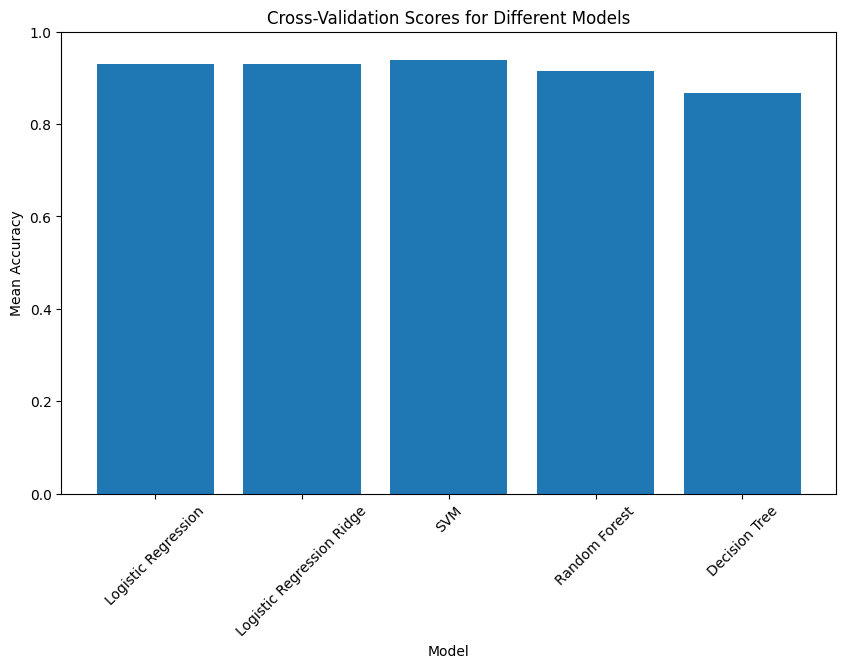

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(cv_scores.keys(), cv_scores.values())
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.title('Cross-Validation Scores for Different Models')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

Training Accuracy: 0.9338162660520251
Model: Logistic Regression, Accuracy: 0.9321, AIC: 979.1456
Accuracy: 0.9321212121212121


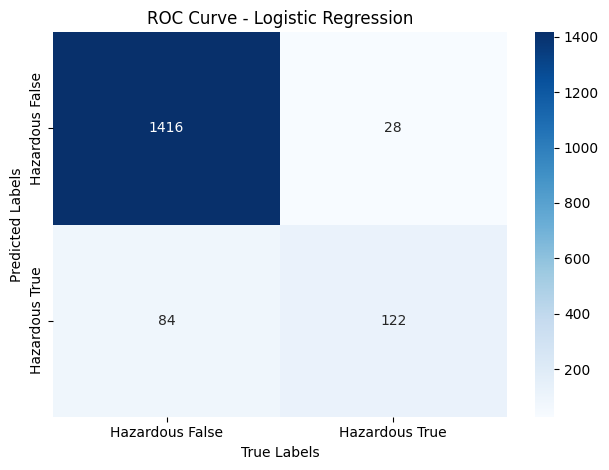

Training Accuracy: 0.9338162660520251
Model: Logistic Regression Ridge, Accuracy: 0.9321, AIC: 979.1456
Accuracy: 0.9321212121212121


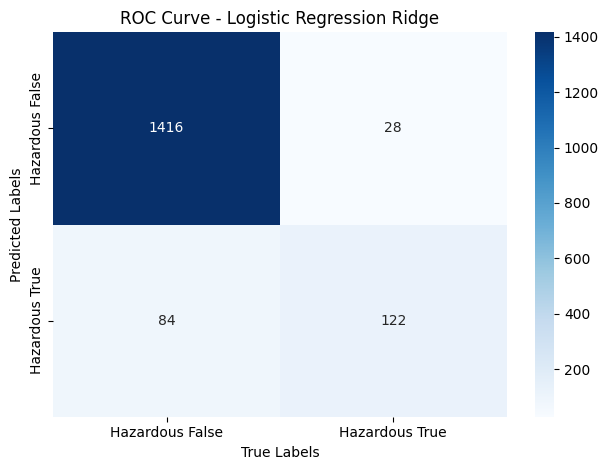

Training Accuracy: 0.9601580507079355
Model: SVM, Accuracy: 0.9412, AIC: 979.1456
Accuracy: 0.9412121212121212


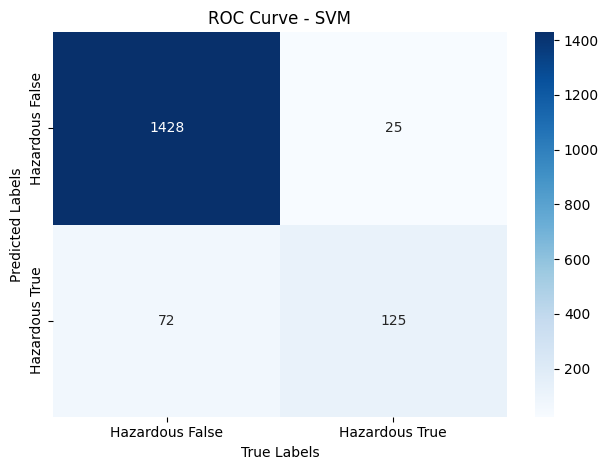

Training Accuracy: 1.0
Model: Random Forest, Accuracy: 0.9339, AIC: 979.1456
Accuracy: 0.933939393939394


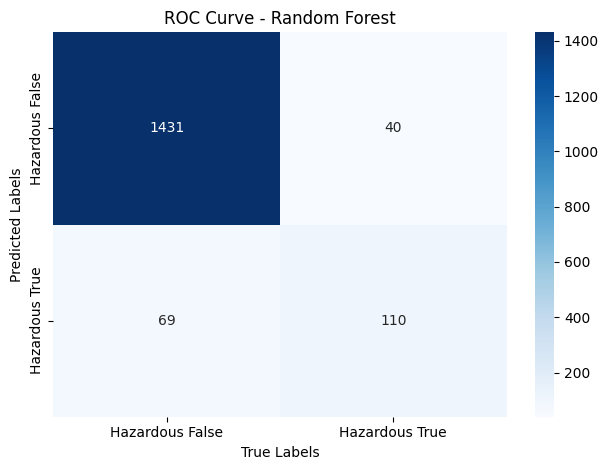

Training Accuracy: 1.0
Model: Decision Tree, Accuracy: 0.8836, AIC: 979.1456
Accuracy: 0.8836363636363637


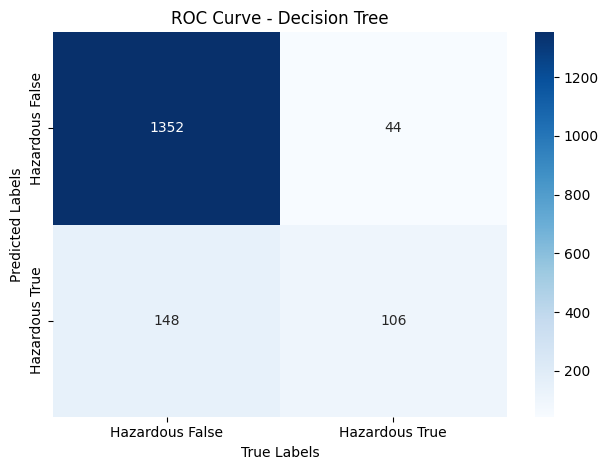

In [ ]:
best_model = None
best_aic = np.inf
for name, model in models:
  # Fit the model
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)

    # Calculate training accuracy
  train_accuracy = accuracy_score(y_train, y_train_pred)
  print(f'Training Accuracy: {train_accuracy}')



  # Predict
  y_pred = model.predict(X_test)

  cm=confusion_matrix(y_pred,y_test)
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Hazardous False', 'Hazardous True'], yticklabels=['Hazardous False', 'Hazardous True'])
  plt.xlabel('True Labels')
  plt.ylabel('Predicted Labels')
  plt.title('ROC Curve - {}'.format(name))

  accuracy = accuracy_score(y_test, y_pred)


  X_train_with_const = add_constant(X_train)
  logit_model = Logit(y_train, X_train_with_const)
  logit_result = logit_model.fit(disp=0)
  aic = logit_result.aic

  print(f"Model: {name}, Accuracy: {accuracy:.4f}, AIC: {aic:.4f}")

  # Check if current model has the lowest AIC
  if aic < best_aic:
      best_aic = aic
      best_model = model
  print(f'Accuracy: {accuracy}')
  plt.tight_layout()
  plt.show()